Jupyter Notebook can be installed like this (<https://jupyter.org/install>):

`python -m pip install notebook`

It can be then opened by running the following command (from your working directory; make sure to restart your Terminal/Command Line after installation):

`jupyter notebook`


In [1]:
import os
import re
import numpy
from pprint import pprint
import pandas
import matplotlib.pyplot as plt

pandas.set_option("display.max_colwidth", 50) # this is my comment


Let's load our data here:

In [13]:
dispatchFile = "entities.csv"
dispatch = pandas.read_csv(dispatchFile, sep="\t", header=0)

Let's do some minor modification: add a column with all dates of each month changed to 1 (we can use that to aggregate our data into months)

In [14]:
dispatch["month"] = [re.sub("-\d\d$", "-01", str(i)) for i in dispatch["date"]]
# convert into date format
dispatch["month"] = pandas.to_datetime(dispatch["month"], format="%Y-%m-%d")
dispatch["date"] = pandas.to_datetime(dispatch["date"], format="%Y-%m-%d")

# reorder columns
dispatch = dispatch[["articleID", "month", "date", "itemType", "itemUnified", "itemID"]]

In [15]:
dispatch.head(10)

,articleID,month,date,itemType,itemUnified,itemID
0,1864-04-28_article_001,1864-04-01,1864-04-28,placename,"gordonsville, orange, virginia","tgn,2111971"
1,1864-04-28_article_002,1864-04-01,1864-04-28,placename,"plymouth, washington, north carolina","tgn,2076159"
2,1864-04-28_article_002,1864-04-01,1864-04-28,placename,"plymouth, washington, north carolina","tgn,2076159"
3,1864-04-28_article_002,1864-04-01,1864-04-28,persname,"wessels,brigadier-general,,,,","wessels,h.,w."
4,1864-04-28_article_002,1864-04-01,1864-04-28,persname,"lincoln,,,,,",lincoln
5,1864-04-28_article_002,1864-04-01,1864-04-28,placename,"plymouth, washington, north carolina","tgn,2076159"
6,1864-04-28_article_002,1864-04-01,1864-04-28,persname,"moffitt,colonel,,,,",moffitt
7,1864-04-28_article_002,1864-04-01,1864-04-28,placename,"plymouth, washington, north carolina","tgn,2076159"
8,1864-04-28_article_002,1864-04-01,1864-04-28,orgname,free school,school
9,1864-04-28_article_002,1864-04-01,1864-04-28,orgname,episcopal church,church


We can easily count frequencies in the following manner:

In [16]:
dispatch['itemUnified'].value_counts()

richmond, richmond, virginia                          32551
united states                                         19152
virginia, united states, north and central america    11042
washington, district of columbia, united states        8949
virginia                                               7267
                                                      ...  
wheeler,,g.,,,                                            1
wrend,,fenton,e.,,                                        1
richards,,c.,m.,,                                         1
porter,,j.,w.,h.,                                         1
catharine,,p.,m.,,                                        1
Name: itemUnified, Length: 147697, dtype: int64

We can also look at a larger part of the table by giving the range of the table:

In [17]:
dispatch['itemUnified'].value_counts().head(50)

richmond, richmond, virginia                          32551
united states                                         19152
virginia, united states, north and central america    11042
washington, district of columbia, united states        8949
virginia                                               7267
charleston, charleston, south carolina                 6943
united kingdom                                         6539
richmond dispatch                                      5161
lincoln,,,,,                                           4681
tennessee                                              4366
kentucky                                               4194
baltimore, baltimore independent city, maryland        4065
petersburg, petersburg, virginia                       4062
north carolina                                         4022
europe,                                                4020
maryland                                               3950
norfolk, norfolk, virginia              

We can also create a subset to focus only on persons (or anything else)

In [18]:
dispatch_persons = dispatch[dispatch["itemType"] == "persname"]

In [19]:
dispatch_persons['itemId'].value_counts().head(50)

KeyError: 'itemId'

In the following few lines of code we can:

- filter our results to pick only the values that we need;
- then plot them on a graph to see how our selected values behaved over time;

In [20]:
var = "grant" # this is our variable

results = dispatch_persons[dispatch_persons.itemUnified.str.contains(var)] # selects only rows where itemUnified contains our `var`;
results = results[["month", "itemType"]] # selecting only two columns (making our table smaller);
results = results.groupby(["month"]).count() # counting all occurences of our `var` during each month;
results = results.reset_index() # this resets the index of the dataframe (necessary step);
results[var] = results["itemType"] # here we create a new column named with our `var`
results = results[["month", var]] # again, select only necessary columns

results.head(10)

,month,grant
0,1860-11-01,7
1,1860-12-01,10
2,1861-01-01,8
3,1861-02-01,11
4,1861-03-01,10
5,1861-04-01,4
6,1861-05-01,3
7,1861-06-01,10
8,1861-07-01,6
9,1861-08-01,7


We can now plot this data onto a graph, where `month` will be on the x-axis, and the counts of our `var` will be mapped on the y-axis.

<AxesSubplot:xlabel='month'>

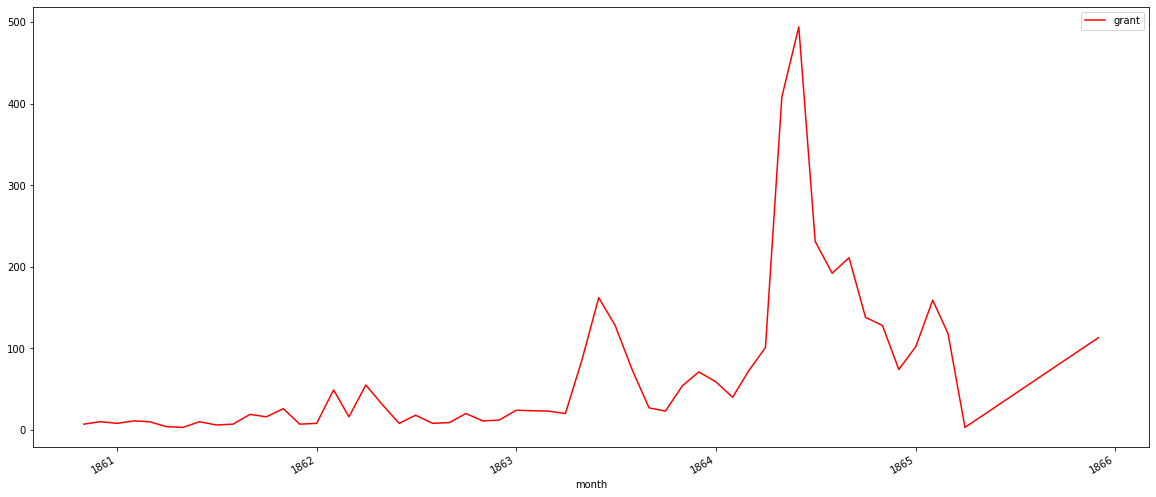

In [21]:
# Plotting directly from DataFrames with Pandas; this section alon is actually enough
results.plot(
    x='month', 
    y=var,  
    legend=True, 
    color='red'
)

The code above is sufficient to print the graph out, but we can also customize how it
looks with the following additional lines of code. You can play around with the parameters to change how it looks (you may need to google for soem additional parameters):

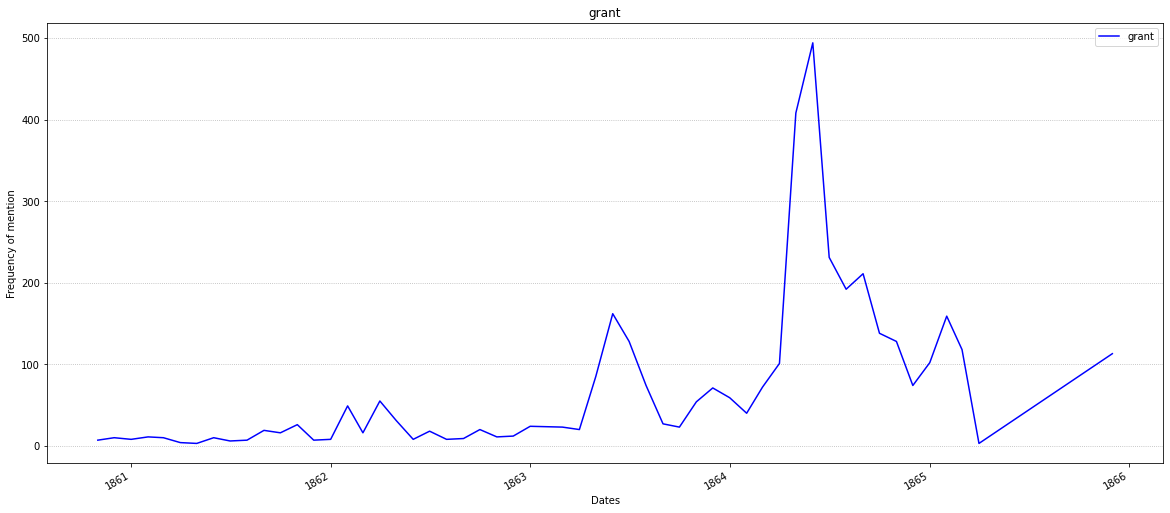

In [22]:
results.plot(
    x='month', 
    y=var,  
    legend=True, 
    color='blue'
)

plt.rcParams["figure.figsize"] = (20,9)
plt.ylabel("Frequency of mention")
plt.xlabel("Dates")
plt.title(var)
plt.gca().yaxis.grid(linestyle=':')

Now, we can reuse the following chunk of code to test multiple variables:

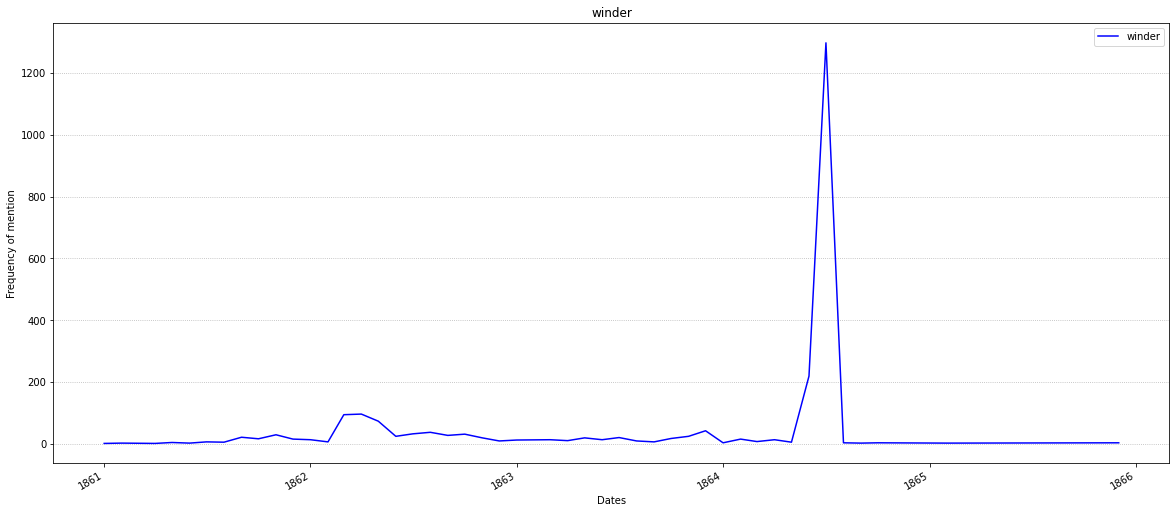

In [23]:
var = "winder" # this is our variable

results = dispatch_persons[dispatch_persons.itemUnified.str.contains(var)] # selects only rows where itemUnified contains our `var`;
results = results[["month", "itemType"]] # selecting only two columns (making our table smaller);
results = results.groupby(["month"]).count() # counting all occurences of our `var` during each month;
results = results.reset_index() # this resets the index of the dataframe (necessary step);
results[var] = results["itemType"] # here we create a new column named with our `var`
results = results[["month", var]] # again, select only necessary columns

results.plot(
    x='month', 
    y=var,  
    legend=True, 
    color='blue'
)

plt.rcParams["figure.figsize"] = (20,9)
plt.ylabel("Frequency of mention")
plt.xlabel("Dates")
plt.title(var)
plt.gca().yaxis.grid(linestyle=':')